In [1]:
%pip install openpyxl

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl


In [3]:
#xlsx_file_path = "https://raw.githubusercontent.com/LuxEmma/ASIM-PPI/refs/heads/main/data/PPB_Affinity/PPB-Affinity.xlsx"
#df = pd.read_excel(xlsx_file_path)
xlsx_file_path = "../../data/PPB_Affinity/PPB-Affinity.xlsx"
df = pd.read_excel(xlsx_file_path)
df.info()
df.head()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12062 non-null  int64  
 1   Source Data Set        12062 non-null  object 
 2   Complex ID             12062 non-null  object 
 3   PDB                    12062 non-null  object 
 4   Mutations              6832 non-null   object 
 5   Ligand Chains          12062 non-null  object 
 6   Receptor Chains        12062 non-null  object 
 7   Ligand Name            12062 non-null  object 
 8   Receptor Name          12062 non-null  object 
 9   KD(M)                  12062 non-null  float64
 10  Affinity Method        8297 non-null   object 
 11  Structure Method       12052 non-null  object 
 12  Temperature(K)         7527 non-null   object 
 13  Resolution(Å)          11760 non-null  float64
 14  PDB PubMed ID          11945 non-null  float64
 15  PD

,Unnamed: 0,Source Data Set,Complex ID,PDB,Mutations,Ligand Chains,Receptor Chains,Ligand Name,Receptor Name,KD(M),Affinity Method,Structure Method,Temperature(K),Resolution(Å),PDB PubMed ID,PDB Release Date,Affinity PubMed ID,Affinity Release Date,Subgroup
0,0,SKEMPI v2.0,"1A22:A, B::PMID=7504735",1A22,NaN,A,B,Human growth hormone,hGH binding protein,9.000000e-10,SPR,X-RAY DIFFRACTION,298,2.60,9571026.0,1998-04-29,7504735,1993 Dec 5,NaN
1,1,SKEMPI v2.0,"1A4Y:A, B::PMID=9050852",1A4Y,NaN,A,B,Ribonuclease inhibitor,Angiogenin,5.000000e-16,Other,X-RAY DIFFRACTION,298,2.00,9311977.0,1998-10-14,9050852,1997 Mar 4,NaN
2,2,SKEMPI v2.0,"1ACB:E, I::PMID=9048543",1ACB,NaN,E,I,Bovine alpha-chymotrypsin,Eglin c,1.490000e-12,IASP,X-RAY DIFFRACTION,294,2.00,1583684.0,1993-10-31,9048543,1997 Feb 18,NaN
3,3,SKEMPI v2.0,"1AHW:A, B, C::PMID=9480775",1AHW,NaN,"A, B",C,Immunoglobulin fab 5G9,Tissue factor,3.400000e-09,IASP,X-RAY DIFFRACTION,298(assumed),3.00,9480775.0,1998-02-25,9480775,1998 Feb 6,NaN
4,4,SKEMPI v2.0,"1AK4:A, D::PMID=9223641",1AK4,NaN,A,D,Cyclophilin A,HIV-1 capsid protein,1.200000e-05,SPR,X-RAY DIFFRACTION,298(assumed),2.36,8980234.0,1997-10-15,9223641,1997 Jun 27,NaN


In [5]:

df.info()

target_col = 'KD(M)' 

print(f"Missing K_D values: {df[target_col].isnull().sum()}")

display(df[target_col].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12062 non-null  int64  
 1   Source Data Set        12062 non-null  object 
 2   Complex ID             12062 non-null  object 
 3   PDB                    12062 non-null  object 
 4   Mutations              6832 non-null   object 
 5   Ligand Chains          12062 non-null  object 
 6   Receptor Chains        12062 non-null  object 
 7   Ligand Name            12062 non-null  object 
 8   Receptor Name          12062 non-null  object 
 9   KD(M)                  12062 non-null  float64
 10  Affinity Method        8297 non-null   object 
 11  Structure Method       12052 non-null  object 
 12  Temperature(K)         7527 non-null   object 
 13  Resolution(Å)          11760 non-null  float64
 14  PDB PubMed ID          11945 non-null  float64
 15  PD

count    1.206200e+04
mean     3.670054e-05
std      8.133960e-04
min      2.000000e-16
25%      9.600000e-10
50%      2.500000e-08
75%      1.337500e-06
max      4.800000e-02
Name: KD(M), dtype: float64

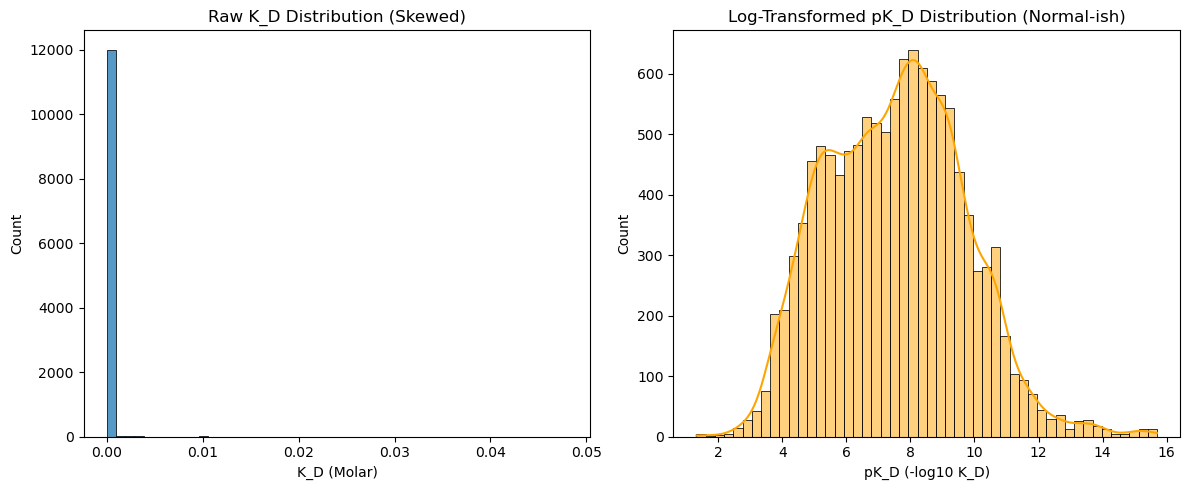

In [6]:

df['pKd'] = -np.log10(df[target_col])

# Visualize the distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[target_col], bins=50, kde=False)
plt.title('Raw K_D Distribution (Skewed)')
plt.xlabel('K_D (Molar)')

plt.subplot(1, 2, 2)
sns.histplot(df['pKd'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed pK_D Distribution (Normal-ish)')
plt.xlabel('pK_D (-log10 K_D)')

plt.tight_layout()
plt.show()

Affinity Method
SPR        3618
FL         1458
Other       805
ITC         591
IASP        505
SP          336
RA          320
Unknown     254
ELISA       172
IARA        125
BLI         104
IAGE          9
Name: count, dtype: int64


C:\Users\Jan R\AppData\Local\Temp\ipykernel_6948\1296681323.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_counts.values, y=method_counts.index, palette='viridis')


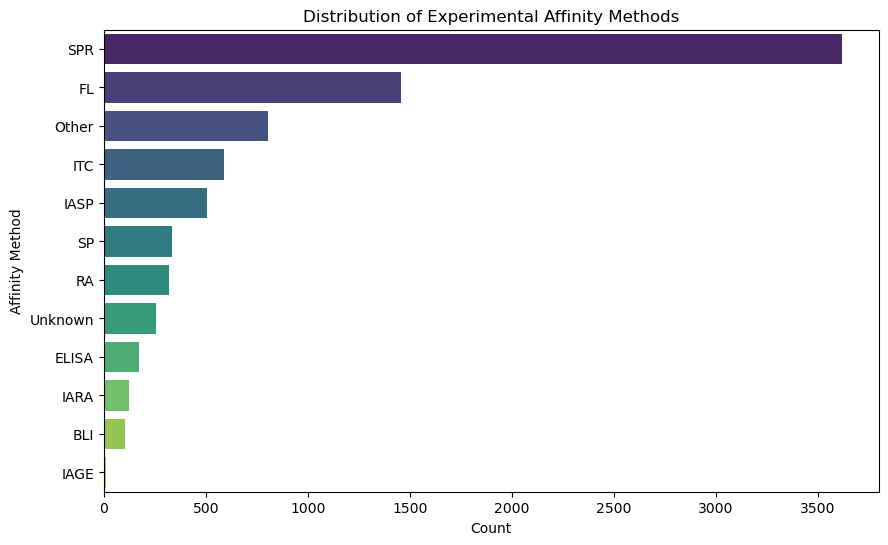

In [ ]:
method_counts = df['Affinity Method'].value_counts()
print(method_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=method_counts.values, y=method_counts.index, palette='viridis')
plt.title('Distribution of Experimental Affinity Methods')
plt.xlabel('Count')
plt.show()